In [ ]:
# 2023.5.1
# reconstructed code 

# random init
# 1D sine function

# leaky_ReLU

In [ ]:
import os

cuda_device = '3'

os.environ["CUDA_VISIBLE_DEVICES"] = cuda_device
os.environ['CUBLAS_WORKSPACE_CONFIG']=':4096:8'

import torch

import numpy as np

from para_init import parameters, setup_seed
from permutation import permutation_train


In [ ]:
import torch.multiprocessing as mp
num_processes = 10

width_vector = [10, 20, 40, 80, 160, 320]

# generate a 2-dimensional matrix to hold the results in (i,j)
result_matrix = np.zeros((len(width_vector), 10, 2))

i = 0

for width in width_vector:
    
    setup_seed(2022)
    
    shared_params = parameters()
    
    shared_params.width = width
    shared_params.adjust_scale = 0
    
            
    if __name__ == "__main__":
        
        mp.set_start_method('spawn', force=True)
        
        manager = mp.Manager()
        results_queue = manager.Queue()

        mp.spawn(permutation_train, args=(shared_params, results_queue), nprocs=num_processes, join=True)
        
        while not results_queue.empty():
            (idx, (error, error_infty)) = results_queue.get()

            result_matrix[i, idx, :] = [error, error_infty]

    i += 1

Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!


In [4]:
print(result_matrix)

[[[2.34519184e-01 1.40057635e+00]
  [3.53014380e-01 1.09458387e+00]
  [4.27444309e-01 1.15096915e+00]
  [3.79404515e-01 1.14991534e+00]
  [2.90930927e-01 8.46297920e-01]
  [2.71806836e-01 8.28068912e-01]
  [4.92221832e-01 1.12756324e+00]
  [5.11781633e-01 1.12440383e+00]
  [3.14442277e-01 1.06483567e+00]
  [1.40396655e-01 1.42081380e+00]]

 [[5.25718294e-02 5.03289819e-01]
  [6.06719814e-02 5.35363793e-01]
  [1.36302471e-01 6.64216280e-01]
  [3.43645029e-02 5.79065204e-01]
  [1.32605033e-02 2.93134481e-01]
  [5.32085728e-03 1.39350742e-01]
  [2.33497620e-01 1.13445199e+00]
  [1.03286229e-01 5.14121711e-01]
  [7.67497392e-03 2.44883835e-01]
  [3.64790065e-03 1.28029346e-01]]

 [[4.70540076e-02 4.24746782e-01]
  [1.62771922e-02 2.85870016e-01]
  [3.59604299e-01 1.09767497e+00]
  [2.76773772e-03 1.40066206e-01]
  [2.69528921e-03 1.16788387e-01]
  [5.11330180e-03 1.29041076e-01]
  [4.81902361e-02 3.93619150e-01]
  [4.52007772e-03 1.58519506e-01]
  [5.83855808e-03 1.74845576e-01]
  [2.66582

(6, 10, 2)
1.1055434396505852
<class 'numpy.ndarray'>
0.0
[0.32152492 0.03056569 0.01429445 0.00464878 0.00176228 0.00038315]
[1.10554344 0.38804331 0.25386994 0.15693509 0.10277366 0.05227406]
y_min: [0.14039665 0.0036479  0.00269529 0.00128726 0.00037109 0.00020612]
y_max: [0.51178163 0.23349762 0.3596043  0.03018426 0.00879888 0.00071556]
[[1.81128261e-01 2.69177853e-02 1.15991629e-02 3.36152379e-03
  1.39119083e-03 1.77028862e-04]
 [1.90256717e-01 2.02931934e-01 3.45309847e-01 2.55354725e-02
  7.03659657e-03 3.32417217e-04]]


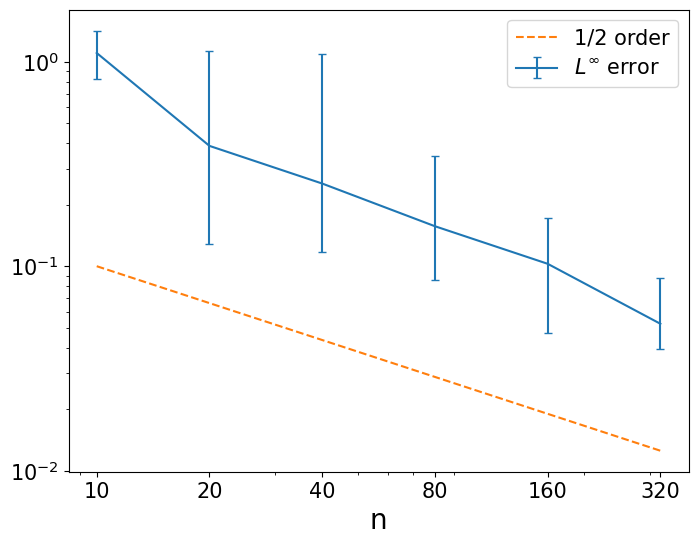

In [ ]:
from statistics import geometric_mean
import matplotlib.pyplot as plt

x = width_vector

print(np.shape(result_matrix))

print(geometric_mean(result_matrix[0,:,1]))

mean = np.zeros(int(len(x)))
mean_inf = np.zeros(int(len(x)))

print(type(mean))

print(mean[0])

for i in range(len(x)):
    mean[i] = geometric_mean(result_matrix[i,:,0])
    mean_inf[i] = geometric_mean(result_matrix[i,:,1])

print(mean)
print(mean_inf)

y_max = np.max(result_matrix[:,:,0], axis = 1)
y_min = np.min(result_matrix[:,:,0], axis = 1)

y_min_inf = np.min(result_matrix[:,:,1], axis = 1)
y_max_inf = np.max(result_matrix[:,:,1], axis = 1)

yerr = np.abs(np.vstack((y_min, y_max)) - mean)

print('y_min: '+str(y_min))
print('y_max: '+str(y_max))
print(yerr)

yerr2 = np.abs(np.vstack((y_min_inf, y_max_inf)) - mean_inf)

start_point = 1E-1

x_ref = [x[0], x[-1]]
y_ref = [start_point, start_point/np.sqrt(np.power(2,len(x)))]

ax = plt.figure(figsize=(8, 6))
plt.errorbar(x, mean_inf, yerr=yerr2, capsize = 3, label='$L^\infty$ error')
plt.plot(x_ref, y_ref, linestyle='--', label='1/2 order')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('n', size=20)
plt.legend(fontsize=15)
plt.xticks(x, x, fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('plot.pdf', bbox_inches='tight')
plt.show()